## Workshop 2 - Unit 3 - Pokemon Battle

##### Members:
- Daniela Ussa Villa
- Luisa Fernanda Muñoz Cardona
- Daniel David García Restrepo

### Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

### Load data with local file

This dataset contains information on all 802 Pokemon from all Seven Generations of Pokemon.

In [ ]:
# Daniela's laptop:
#df = pd.read_csv('Dataset/pokemon.csv')

# Daniel's laptop:
#df = pd.read_csv('C:/Users/user/Documents/Programación/Datasets/pokemon.csv')

# Daniel's PC:
df = pd.read_csv('C:/Users/danie/OneDrive/Escritorio/UAO/II Semestre/Programación/SEMANA 15/pokemon.csv')

# Luisa's PC:
#df = pd.read_csv('')

In [3]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [4]:
# We use "df.shape" to know how many rows and columns the dataset has
df.shape

(801, 41)

In [5]:
# We use "df" to see an initial and a final part of the data set.
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


## Activities
#### We chose the type of Pokémon: Poison

### 1. Basic Count
##### Determine how many Pokémon belong to the selected type

In [5]:
# We filter the type "poison" using the column "type1" and "type2" of the dataset
df_poison = df[(df['type1'] == 'poison') | (df['type2'] == 'poison')]
quantity_poison = df_poison.shape[0]

print(f"Number of Pokémon of type Poison: {df_poison.shape[0]}")

Number of Pokémon of type Poison: 64


C:\Users\danie\AppData\Local\Temp\ipykernel_7308\2708673474.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette=colors)


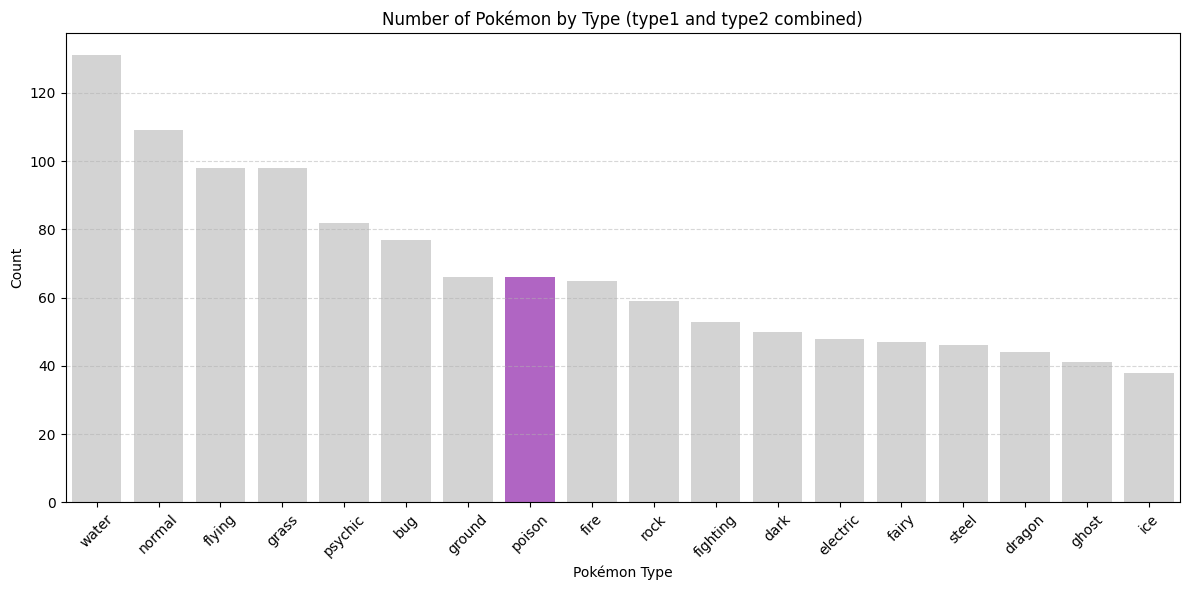

In [8]:
# Combine type1 and type2 in one column
all_types = pd.concat([df['type1'], df['type2']]).dropna()

# Counting the number of times each type appears
type_counts = all_types.value_counts().sort_values(ascending=False)

# Create a list of colors where “poison” is highlighted.
colors = ['mediumorchid' if tipo == 'poison' else 'lightgray' for tipo in type_counts.index]

# Graph
plt.figure(figsize=(12, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=colors)
plt.title('Number of Pokémon by Type (type1 and type2 combined)')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 2. Power Analysis

##### Plot the distribution of power levels (e.g.: using histogram, boxplot, etc.)

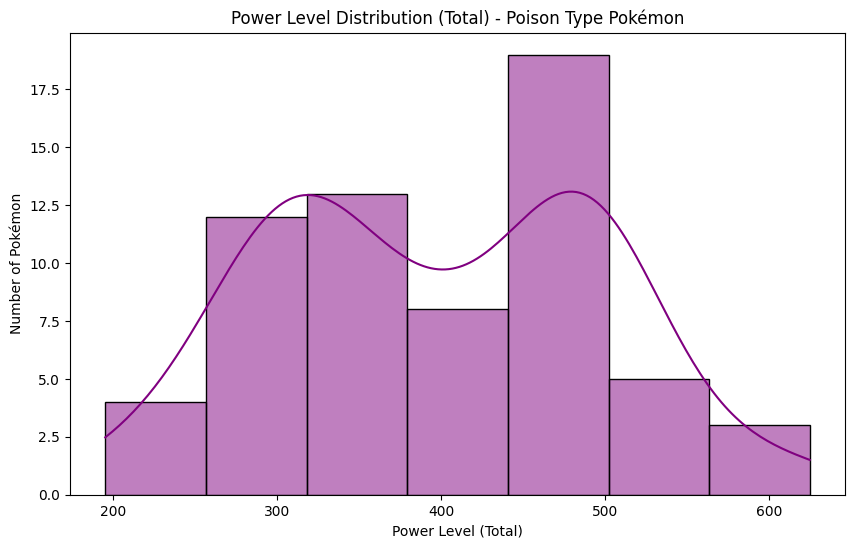

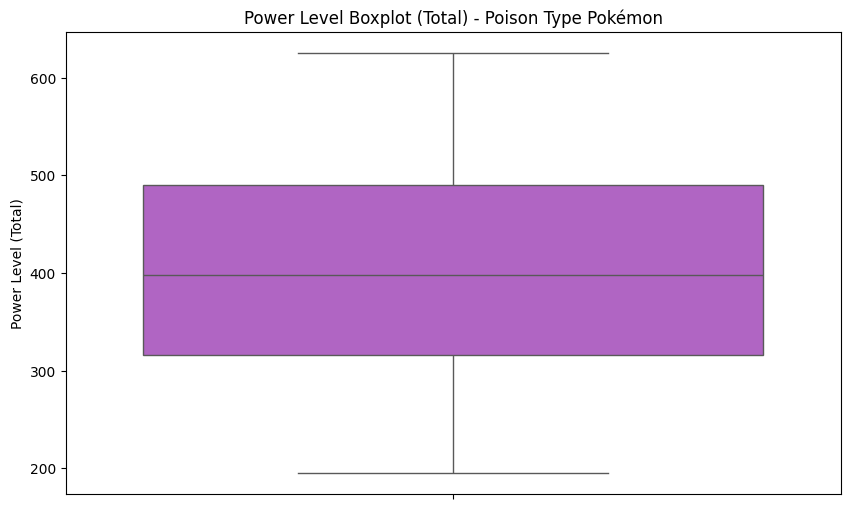

In [7]:
# A. Filter poison type Pokémon
df_poison = df[(df['type1'] == 'poison') | (df['type2'] == 'poison')].copy()

# B. Create the column 'total' if it doesn't exist
if 'total' not in df_poison.columns:
    df_poison['total'] = df_poison[['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']].sum(axis=1)

# C. Histogram of power level
plt.figure(figsize=(10, 6))
sns.histplot(df_poison['total'], kde=True, color='purple')
plt.title('Power Level Distribution (Total) - Poison Type Pokémon' )
plt.xlabel('Power Level (Total)')
plt.ylabel('Number of Pokémon')
plt.show()

# D. Boxplot of power level
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_poison['total'], color='mediumorchid')
plt.title('Power Level Boxplot (Total) - Poison Type Pokémon')
plt.ylabel('Power Level (Total)')
plt.show()


##### Identify the most powerful and weakest Pokemon

In [12]:
# Most powerful Poison type Pokémon
pokemon_mas_poderoso = df_poison.loc[df_poison['total'].idxmax()]
print("Most powerful poison type Pokémon:")
df_poderoso = pokemon_mas_poderoso[['name', 'total']].to_frame().T
print(tabulate(df_poderoso, headers='keys', tablefmt='fancy_grid'))


# Weakest Poison type Pokémon
pokemon_mas_debil = df_poison.loc[df_poison['total'].idxmin()]
print("\nWeakest Poison type Pokémon:")
df_debil = pokemon_mas_debil[['name', 'total']].to_frame().T
print(tabulate(df_debil, headers='keys', tablefmt='fancy_grid'))

Most powerful poison type Pokémon:
╒════╤══════════╤═════════╕
│    │ name     │   total │
╞════╪══════════╪═════════╡
│  2 │ Venusaur │     625 │
╘════╧══════════╧═════════╛

Weakest Poison type Pokémon:
╒════╤════════╤═════════╕
│    │ name   │   total │
╞════╪════════╪═════════╡
│ 12 │ Weedle │     195 │
╘════╧════════╧═════════╛


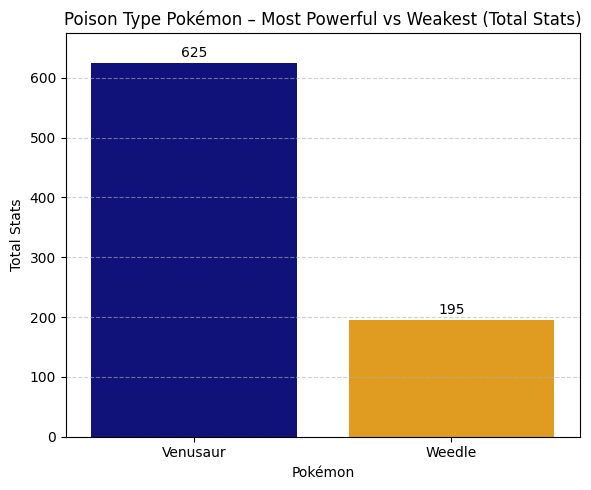

In [24]:
# Create a DataFrame for plotting
df_total_stats = pd.DataFrame({
    'name': [pokemon_mas_poderoso['name'], pokemon_mas_debil['name']],
    'total': [pokemon_mas_poderoso['total'], pokemon_mas_debil['total']],
    'status': ['Most Powerful', 'Weakest']
})

# Bar chart without warning (using hue)
plt.figure(figsize=(6, 5))
sns.barplot(data=df_total_stats, x='name', y='total', hue='status',
            palette={'Most Powerful': 'darkblue', 'Weakest': 'orange'}, dodge=False, legend=False)

plt.title('Poison Type Pokémon – Most Powerful vs Weakest (Total Stats)')
plt.xlabel('Pokémon')
plt.ylabel('Total Stats')
plt.ylim(0, df_total_stats['total'].max() + 50)

# Add labels on top of each bar
for i, row in df_total_stats.iterrows():
    plt.text(i, row['total'] + 5, f"{row['total']}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 3. Defense Analysis

##### Plot the distribution of defense levels

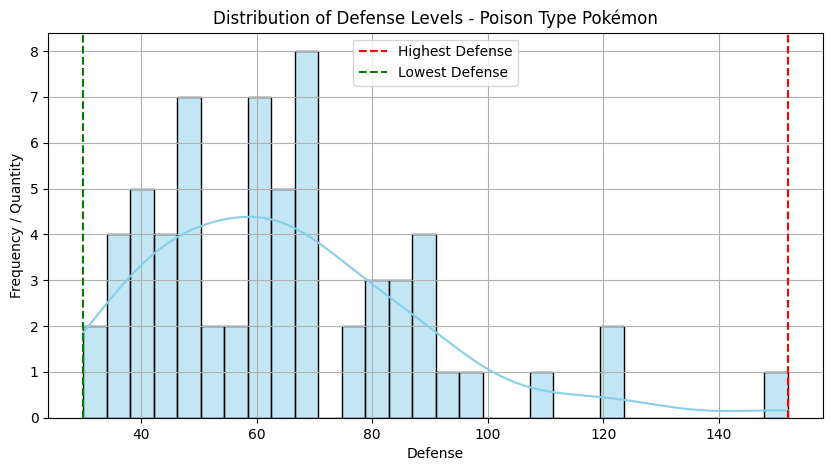

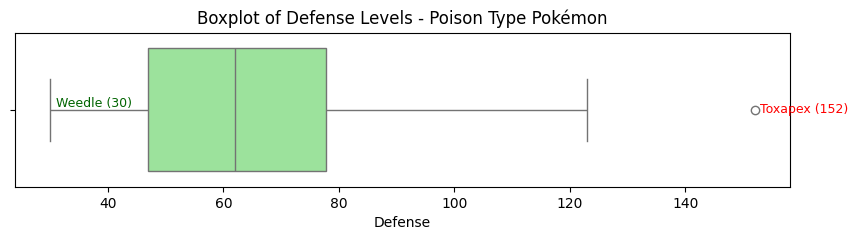

In [11]:
# Histogram of defense levels for Poison type Pokémon
plt.figure(figsize=(10, 5))
sns.histplot(df_poison['defense'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Defense Levels - Poison Type Pokémon')
plt.xlabel('Defense')
plt.ylabel('Frequency / Quantity')
plt.grid(True)

highest_def = df_poison['defense'].max()
lowest_def = df_poison['defense'].min()
plt.axvline(highest_def, color='red', linestyle='--', label='Highest Defense')
plt.axvline(lowest_def, color='green', linestyle='--', label='Lowest Defense')
plt.legend()

plt.show()

# Boxplot to see distribution and outliers
plt.figure(figsize=(10, 2))
sns.boxplot(x=df_poison['defense'], color='lightgreen')
plt.title('Boxplot of Defense Levels - Poison Type Pokémon')
plt.xlabel('Defense')

plt.text(highest_def + 1, 0.02, f"{df_poison[df_poison['defense'] == highest_def]['name'].values[0]} ({highest_def})", color='red', fontsize=9)
plt.text(lowest_def + 1, -0.02, f"{df_poison[df_poison['defense'] == lowest_def]['name'].values[0]} ({lowest_def})", color='darkgreen', fontsize=9)

plt.show()

##### Identify the Pokémon with the highest and lowest defense value

In [14]:
# Poison type Pokémon with the highest defense
pokemon_mayor_defensa = df_poison.loc[df_poison['defense'].idxmax()]
print("Poison type Pokémon with the highest defense:")
df_alto = pokemon_mayor_defensa[['name', 'total']].to_frame().T
print(tabulate(df_alto, headers='keys', tablefmt='fancy_grid'))

# Poison type Pokémon with the lowest defense
pokemon_menor_defensa = df_poison.loc[df_poison['defense'].idxmin()]
print("\nPoison type Pokémon with the lowest defense:")
df_bajo = pokemon_menor_defensa[['name', 'total']].to_frame().T
print(tabulate(df_bajo, headers='keys', tablefmt='fancy_grid'))




Poison type Pokémon with the highest defense:
╒═════╤═════════╤═════════╕
│     │ name    │   total │
╞═════╪═════════╪═════════╡
│ 747 │ Toxapex │     495 │
╘═════╧═════════╧═════════╛

Poison type Pokémon with the lowest defense:
╒════╤════════╤═════════╕
│    │ name   │   total │
╞════╪════════╪═════════╡
│ 12 │ Weedle │     195 │
╘════╧════════╧═════════╛


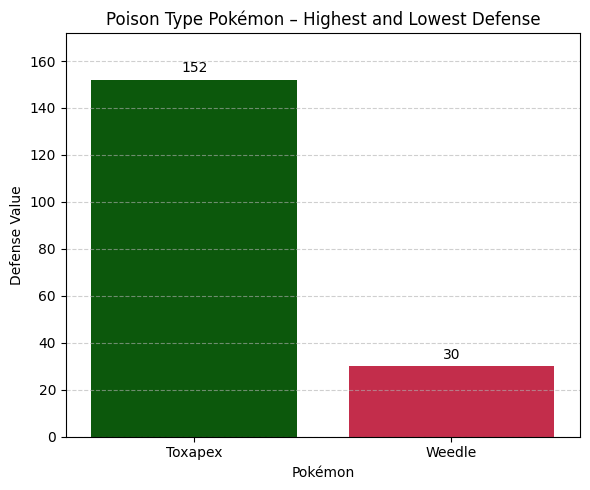

In [21]:
# Data Graph
df_defense = pd.DataFrame({
    'name': [pokemon_mayor_defensa['name'], pokemon_menor_defensa['name']],
    'defense': [pokemon_mayor_defensa['defense'], pokemon_menor_defensa['defense']],
    'status': ['Highest', 'Lowest']  # Para usar como hue
})

plt.figure(figsize=(6, 5))
sns.barplot(data=df_defense, x='name', y='defense', hue='status',
            palette={'Highest': 'darkgreen', 'Lowest': 'crimson'}, dodge=False, legend=False)

plt.title('Poison Type Pokémon – Highest and Lowest Defense')
plt.xlabel('Pokémon')
plt.ylabel('Defense Value')
plt.ylim(0, df_defense['defense'].max() + 20)

# Add labels above the bars
for i, row in df_defense.iterrows():
    plt.text(i, row['defense'] + 2, f"{row['defense']}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



### 4. Gender Distribution

##### Calculate and plot (e.g., pie or bar graph) the average percentage of males in the selected type

Average percentage of male Poison type Pokémon: 51.63%


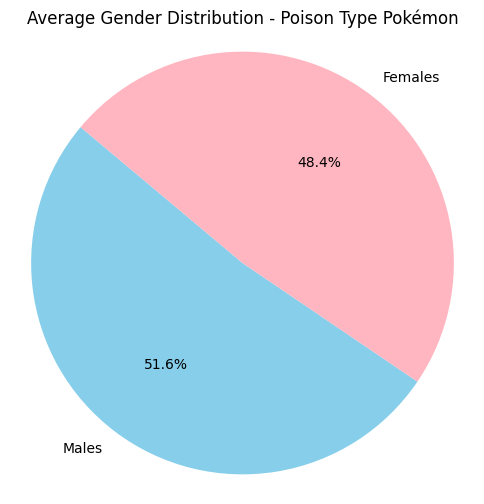

In [ ]:
# Calculate the average percentage of males, ignoring missing values
average_male_percentage = df_poison['percentage_male'].mean()
print(f"Average percentage of male Poison type Pokémon: {average_male_percentage:.2f}%")


# Data for pie chart
labels = ['Males', 'Females']
values = [average_male_percentage, 100 - average_male_percentage]
colors = ['skyblue', 'lightpink']

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Gender Distribution - Poison Type Pokémon')
plt.axis('equal')  # Makes the graph a pie chart
plt.show()

### 5. Legendary Pokémon

##### Quantify how many Pokémon of the selected type are legendary (legendary = True)

In [15]:
# Filter legendary Poison type Pokémon
legendary_poison = df_poison[df_poison['is_legendary'] == True]

# Count them
legendary_count = legendary_poison.shape[0]
print(f"Number of Poison type Pokémon that are legendary: {legendary_count}")

# Show their names and total power
print("\nLegendary Poison type Pokémon:")
df_legendarios = legendary_poison[['name', 'total']]
print(tabulate(df_legendarios, headers='keys', tablefmt='fancy_grid'))


Number of Poison type Pokémon that are legendary: 1

Legendary Poison type Pokémon:
╒═════╤══════════╤═════════╕
│     │ name     │   total │
╞═════╪══════════╪═════════╡
│ 792 │ Nihilego │     570 │
╘═════╧══════════╧═════════╛


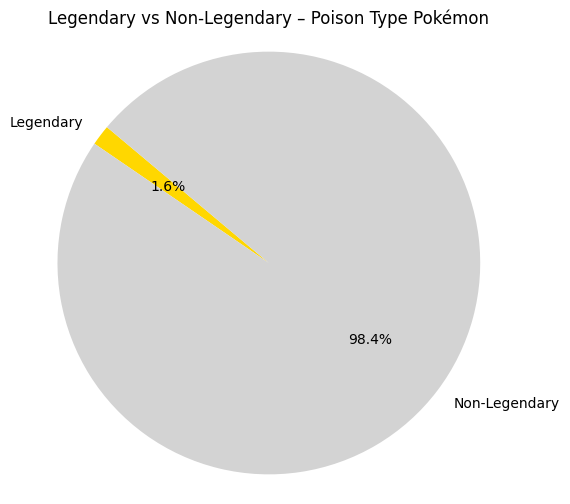

In [19]:
# Total number of Poison Pokémon
total_poison = df_poison.shape[0]

# Number of legendary
legendary_count = legendary_poison.shape[0]
non_legendary_count = total_poison - legendary_count

# Data for the graph
labels = ['Legendary', 'Non-Legendary']
values = [legendary_count, non_legendary_count]
colors = ['gold', 'lightgray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Legendary vs Non-Legendary – Poison Type Pokémon')
plt.axis('equal')
plt.show()


### 6. Relationship to other types

##### Plot the average levels of damage your Pokémon type takes from other types (against_*)

Columns of damage received by other types of Pokémon: ['against_bug', 'against_dark', 'against_dragon', 'against_electric', 'against_fairy', 'against_fight', 'against_fire', 'against_flying', 'against_ghost', 'against_grass', 'against_ground', 'against_ice', 'against_normal', 'against_poison', 'against_psychic', 'against_rock', 'against_steel', 'against_water']


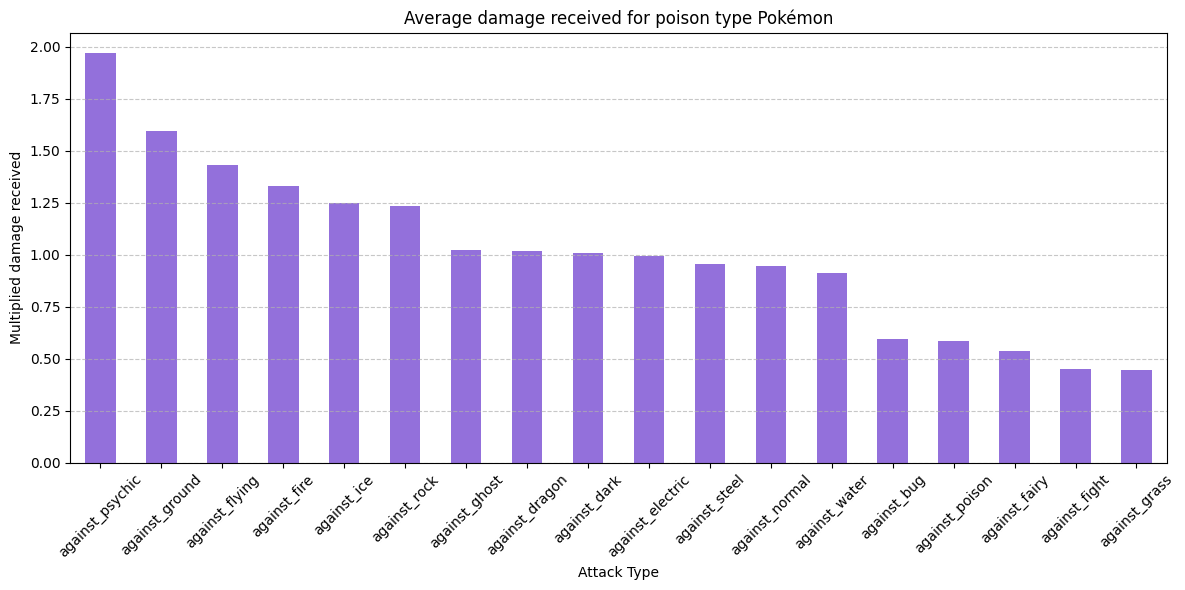

In [ ]:
# The columns against_* indicate how much damage a Pokémon of each type takes
columnas_against = [col for col in df_poison.columns if col.startswith('against_')]
print(f"Columns of damage received by other types of Pokémon: {columnas_against}")

# Calculate the average damage received from each type
promedios_dano = df_poison[columnas_against].mean()

# Create bar chart
plt.figure(figsize=(12, 6))
promedios_dano.sort_values(ascending=False).plot(kind='bar', color='mediumpurple')

plt.title('Average damage received for poison type Pokémon')
plt.xlabel('Attack Type')
plt.ylabel('Multiplied damage received')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### What type of Pokémon does the most damage to your Pokémon type?
##### What type of Pokémon does the least damage to your Pokémon type?

The type that deals the most damage to Poison type Pokémon is: psychic (1.97x)
The type that deals the least damage to Poison type Pokémon is: grass (0.45x)


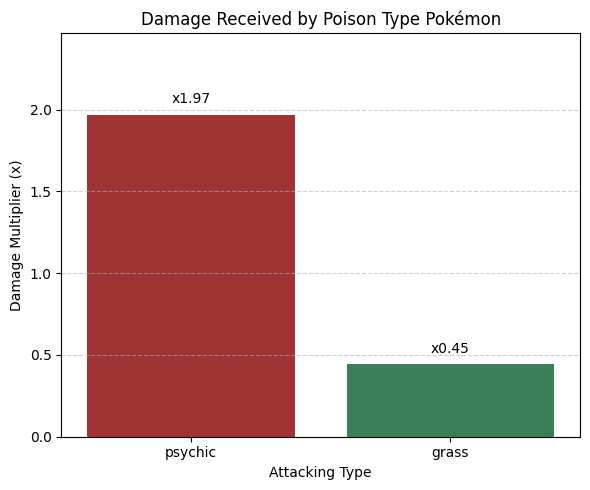

In [30]:
# Type that deals the most damage to Poison type Pokémon
most_damage_type = promedios_dano.idxmax().replace('against_', '')
most_damage_value = promedios_dano.max()

# Type that deals the least damage to Poison type Pokémon
least_damage_type = promedios_dano.idxmin().replace('against_', '')
least_damage_value = promedios_dano.min()

print(f"The type that deals the most damage to Poison type Pokémon is: {most_damage_type} ({most_damage_value:.2f}x)")
print(f"The type that deals the least damage to Poison type Pokémon is: {least_damage_type} ({least_damage_value:.2f}x)")

# Create DataFrame for graph
df_damage_poison = pd.DataFrame({
    'type': [most_damage_type, least_damage_type],
    'damage_multiplier': [most_damage_value, least_damage_value],
    'impact': ['Most Damage', 'Least Damage']
})

# Bar chart
plt.figure(figsize=(6, 5))
sns.barplot(data=df_damage_poison, x='type', y='damage_multiplier', hue='impact',
            palette={'Most Damage': 'firebrick', 'Least Damage': 'seagreen'},
            dodge=False, legend=False)

plt.title('Damage Received by Poison Type Pokémon')
plt.xlabel('Attacking Type')
plt.ylabel('Damage Multiplier (x)')
plt.ylim(0, df_damage_poison['damage_multiplier'].max() + 0.5)

# Add values on top of bars
for i, row in df_damage_poison.iterrows():
    plt.text(i, row['damage_multiplier'] + 0.05, f"x{row['damage_multiplier']:.2f}", ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Looking at all the dataset, what type of Pokémon does your Pokémon type hurt more? 
##### What type of Pokémon does your Pokémon type hurt less?

Poison attacks are most effective against: fairy (x2.02)
Poison attacks are least effective against: steel (x0.00)


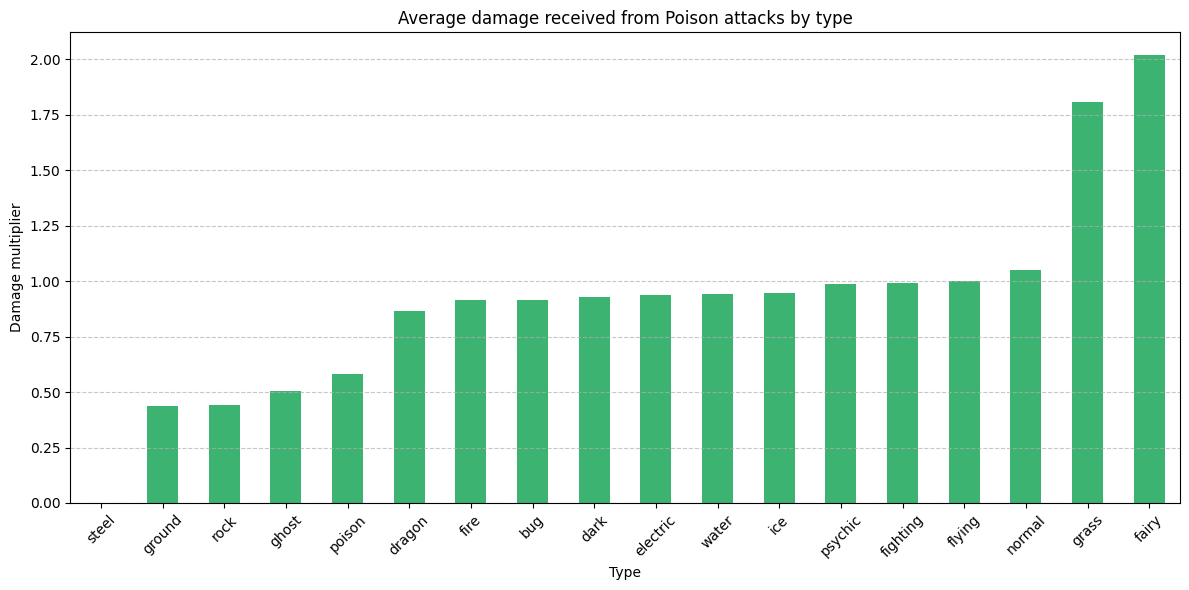

In [ ]:
# Concatenate both type1 and type2 to consider all types
all_types = pd.concat([df[['type1', 'against_poison']].rename(columns={'type1': 'type'}), df[['type2', 'against_poison']].rename(columns={'type2': 'type'})])

# Drop rows where 'type' is missing
all_types = all_types.dropna(subset=['type']) # .dropna is a method used to remove rows or columns containing missing values (Null, NaN, etc) from a DataFrame

# Calculate average damage received from Poison attacks by each type
avg_damage = all_types.groupby('type')['against_poison'].mean() # .groupby allows you to group the data in a DataFrame according to the values of one or more columns

avg_damage_sorted = avg_damage.sort_values()

# Display the most and least effective types
most_effective_type = avg_damage_sorted.index[-1]
least_effective_type = avg_damage_sorted.index[0]

print(f"Poison attacks are most effective against: {most_effective_type} (x{avg_damage_sorted.iloc[-1]:.2f})")
print(f"Poison attacks are least effective against: {least_effective_type} (x{avg_damage_sorted.iloc[0]:.2f})")

# Bar plot of average damage received from Poison attacks by type
plt.figure(figsize=(12, 6))
avg_damage_sorted.plot(kind='bar', color='mediumseagreen')
plt.title('Average damage received from Poison attacks by type')
plt.xlabel('Type')
plt.ylabel('Damage multiplier')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Speed, Height, Weight

##### For each characteristic: analyze the distribution (e.g., using histograms), identify outliers (e.g., using boxplot or IQR method), calculate the mean and median, and list the Pokémon with the minimum and maximum values.

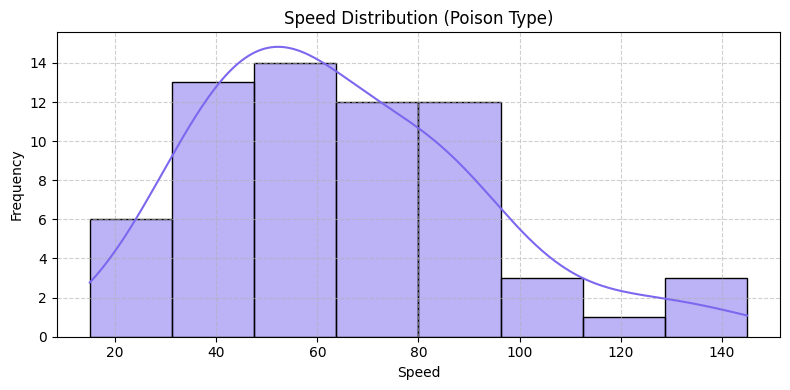

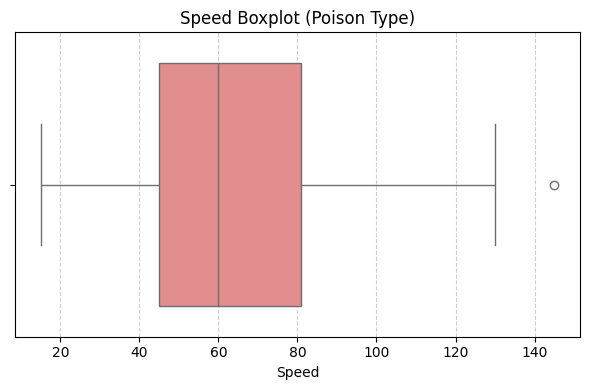


Speed Statistics (Poison Type Pokémon):
╒══════════════╤═════════╕
│ Statistic    │   Value │
╞══════════════╪═════════╡
│ Mean Speed   │   64.97 │
├──────────────┼─────────┤
│ Median Speed │   60    │
╘══════════════╧═════════╛

Poison Pokémon with lowest speed:
╒═════╤═════════╤═════════╕
│     │ name    │   speed │
╞═════╪═════════╪═════════╡
│ 589 │ Foongus │      15 │
╘═════╧═════════╧═════════╛

Poison Pokémon with highest speed:
╒════╤══════════╤═════════╕
│    │ name     │   speed │
╞════╪══════════╪═════════╡
│ 14 │ Beedrill │     145 │
╘════╧══════════╧═════════╛


In [17]:
# Speed
# 1. Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_poison['speed'].dropna(), kde=True, color='mediumslateblue')
plt.title('Speed Distribution (Poison Type)')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_poison['speed'], color='lightcoral')
plt.title('Speed Boxplot (Poison Type)')
plt.xlabel('Speed')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Calculate mean and median
media_speed = df_poison['speed'].mean()
mediana_speed = df_poison['speed'].median()

estadisticas_speed = [
    ['Mean Speed', f"{media_speed:.2f}"],
    ['Median Speed', f"{mediana_speed:.2f}"]
]

print("\nSpeed Statistics (Poison Type Pokémon):")
print(tabulate(estadisticas_speed, headers=['Statistic', 'Value'], tablefmt='fancy_grid'))

# 4. Pokémon with minimum and maximum values
min_speed = df_poison.loc[df_poison['speed'] == df_poison['speed'].min(), ['name', 'speed']]
print("\nPoison Pokémon with lowest speed:")
print(tabulate(min_speed, headers='keys', tablefmt='fancy_grid'))

max_speed = df_poison.loc[df_poison['speed'] == df_poison['speed'].max(), ['name', 'speed']]
print("\nPoison Pokémon with highest speed:")
print(tabulate(max_speed, headers='keys', tablefmt='fancy_grid'))

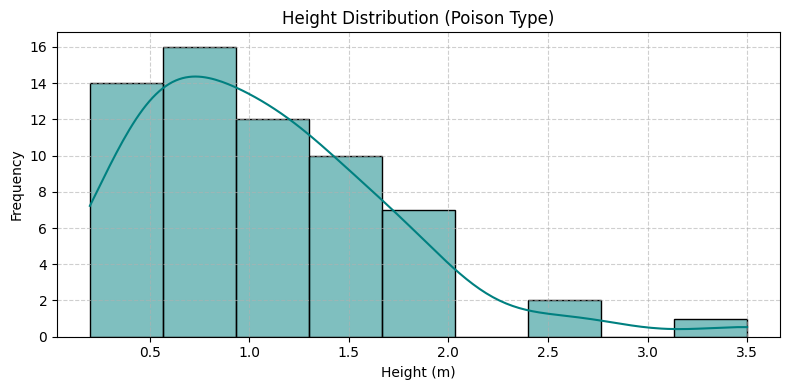

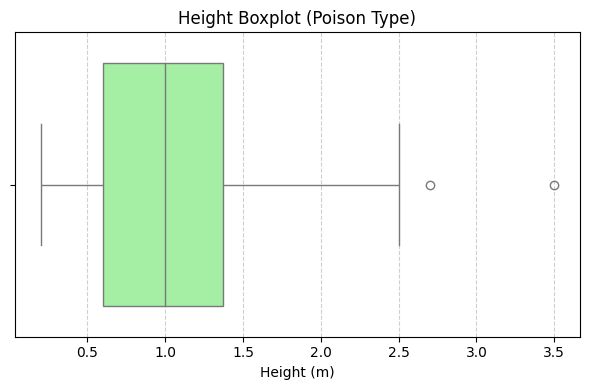


Height Statistics (Poison Type Pokémon):
╒═══════════════════╤═════════╕
│ Statistic         │   Value │
╞═══════════════════╪═════════╡
│ Mean Height (m)   │    1.07 │
├───────────────────┼─────────┤
│ Median Height (m) │    1    │
╘═══════════════════╧═════════╛

Poison Pokémon with lowest height:
╒═════╤═════════╤════════════╕
│     │ name    │   height_m │
╞═════╪═════════╪════════════╡
│ 405 │ Budew   │        0.2 │
├─────┼─────────┼────────────┤
│ 589 │ Foongus │        0.2 │
╘═════╧═════════╧════════════╛

Poison Pokémon with highest height:
╒════╤════════╤════════════╕
│    │ name   │   height_m │
╞════╪════════╪════════════╡
│ 23 │ Arbok  │        3.5 │
╘════╧════════╧════════════╛


In [22]:
# Height

# 1. Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_poison['height_m'].dropna(), kde=True, color='teal')
plt.title('Height Distribution (Poison Type)')
plt.xlabel('Height (m)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_poison['height_m'], color='palegreen')
plt.title('Height Boxplot (Poison Type)')
plt.xlabel('Height (m)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Mean and median
mean_height = df_poison['height_m'].mean()
median_height = df_poison['height_m'].median()

estadisticas_height = [
    ['Mean Height (m)', f"{mean_height:.2f}"],
    ['Median Height (m)', f"{median_height:.2f}"]
]

print("\nHeight Statistics (Poison Type Pokémon):")
print(tabulate(estadisticas_height, headers=['Statistic', 'Value'], tablefmt='fancy_grid'))

# 4. Pokémon with min and max height
min_height = df_poison[df_poison['height_m'] == df_poison['height_m'].min()][['name', 'height_m']]
print("\nPoison Pokémon with lowest height:")
print(tabulate(min_height, headers='keys', tablefmt='fancy_grid'))

max_height = df_poison[df_poison['height_m'] == df_poison['height_m'].max()][['name', 'height_m']]
print("\nPoison Pokémon with highest height:")
print(tabulate(max_height, headers='keys', tablefmt='fancy_grid'))



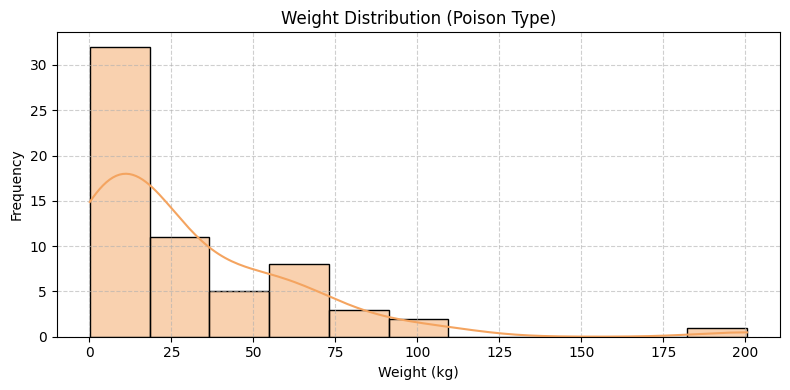

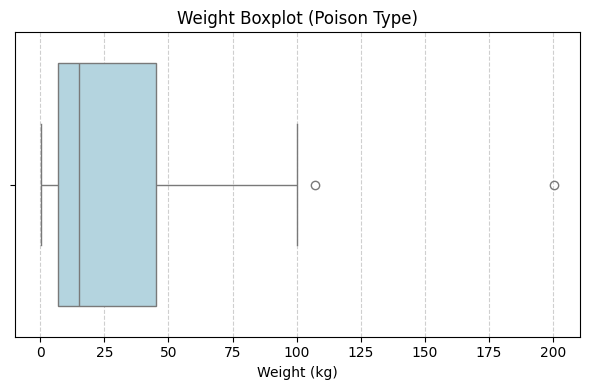


Weight Statistics (Poison Type Pokémon):
╒════════════════════╤═════════╕
│ Statistic          │   Value │
╞════════════════════╪═════════╡
│ Mean Weight (kg)   │   29.78 │
├────────────────────┼─────────┤
│ Median Weight (kg) │   15    │
╘════════════════════╧═════════╛

Poison Pokémon with lowest weight:
╒════╤═════════╤═════════════╕
│    │ name    │   weight_kg │
╞════╪═════════╪═════════════╡
│ 91 │ Gastly  │         0.1 │
├────┼─────────┼─────────────┤
│ 92 │ Haunter │         0.1 │
╘════╧═════════╧═════════════╛

Poison Pokémon with highest weight:
╒═════╤═══════════╤═════════════╕
│     │ name      │   weight_kg │
╞═════╪═══════════╪═════════════╡
│ 544 │ Scolipede │       200.5 │
╘═════╧═══════════╧═════════════╛


In [25]:
# Weight

# 1. Histogram
plt.figure(figsize=(8, 4))
sns.histplot(df_poison['weight_kg'].dropna(), kde=True, color='sandybrown')
plt.title('Weight Distribution (Poison Type)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_poison['weight_kg'], color='lightblue')
plt.title('Weight Boxplot (Poison Type)')
plt.xlabel('Weight (kg)')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Mean and median
mean_weight = df_poison['weight_kg'].mean()
median_weight = df_poison['weight_kg'].median()

estadisticas_weight = [
    ['Mean Weight (kg)', f"{mean_weight:.2f}"], 
    ['Median Weight (kg)', f"{median_weight:.2f}"]
]
print("\nWeight Statistics (Poison Type Pokémon):")
print(tabulate(estadisticas_weight, headers=['Statistic', 'Value'], tablefmt = 'fancy_grid'))

# 4. Pokémon with min and max weight
min_weight = df_poison[df_poison['weight_kg'] == df_poison['weight_kg'].min()][['name', 'weight_kg']]
print("\nPoison Pokémon with lowest weight:")
print(tabulate(min_weight, headers='keys', tablefmt='fancy_grid'))

max_weight = df_poison[df_poison['weight_kg'] == df_poison['weight_kg'].max()][['name', 'weight_kg']]
print("\nPoison Pokémon with highest weight:")
print(tabulate(max_weight, headers='keys', tablefmt='fancy_grid'))


### 8. Strategic Choice

##### Based on the data, justify which Pokémon (of your type) you would choose for a tournament. Consider key stats, legendary, advantages/disadvantages, etc.

In [26]:
# Sort Poison type Pokémon by total power (total), speend and legendary status
most_powerful_pokemon = df_poison[['name', 'total', 'speed', 'is_legendary', 'defense', 'attack', 'sp_attack']].sort_values(by='total', ascending=False)

print("Top Poison type Pokémon by total stats:\n")
print(tabulate(most_powerful_pokemon.head(10), headers='keys', tablefmt='fancy_grid'))

Top Poison type Pokémon by total stats:

╒═════╤════════════╤═════════╤═════════╤════════════════╤═══════════╤══════════╤═════════════╕
│     │ name       │   total │   speed │   is_legendary │   defense │   attack │   sp_attack │
╞═════╪════════════╪═════════╪═════════╪════════════════╪═══════════╪══════════╪═════════════╡
│   2 │ Venusaur   │     625 │      80 │              0 │       123 │      100 │         122 │
├─────┼────────────┼─────────┼─────────┼────────────────┼───────────┼──────────┼─────────────┤
│  93 │ Gengar     │     600 │     130 │              0 │        80 │       65 │         170 │
├─────┼────────────┼─────────┼─────────┼────────────────┼───────────┼──────────┼─────────────┤
│ 792 │ Nihilego   │     570 │     103 │              1 │        47 │       53 │         127 │
├─────┼────────────┼─────────┼─────────┼────────────────┼───────────┼──────────┼─────────────┤
│ 168 │ Crobat     │     535 │     130 │              0 │        80 │       90 │          70 │
├─────┼──

### Strategic Choice – Gengar (Poison Type)

Based on the data analysis, we choose **Gengar** as the best Poison type Pokémon for a tournament.

**Reasons for selecting Gengar:**
- **Total stats:** 600 — one of the highest among Poison type Pokémon.
- **Speed:** It has 130 speed, so it can attack first 
- **Special Attack:** It has 170 special attack, the highest of all Poison Pokémon
- **Legendary status:** No. Gengar isn't a legendary, so it can be used in more battles
- **Good balance** It's fast and strong. This is good for attacking

**Advantages:**
- Poison attacks are **very good against Fairy type** Pokémon.
- Gengar is also **Ghost type**, so it is good against **Psychic** and **Ghost** types.
- It can use powerful moves like Sludge Bomb and Shadow Ball.


**Disadvantages:**
- Poison attacks **do not work on Steel type** Pokémon (0 damage).
. Gengar has **low defense** and **low HP**. It can be defeated fast.

##### **What type of Pokémon would you like to duel against?**

Gengar should fight **Fairy type** Pokémon. Poison is strong against Fairy.


##### **What type of Pokémon would you not want to duel?**

Gengar should avoid **Steel type** Pokémon. Poison attacks do not work on Steel.
